In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [19]:
# Define paths to your CSV and JSON files
main_csv_path = r'C:\Users\user\Downloads\Projects\Mine\Full_Stack_Development\Python\source_f_copy.csv'
main_json_path = r'C:\Users\user\Downloads\Projects\Mine\Full_Stack_Development\Python\source_l_copy.json'

In [20]:
# Verify that the files exist
if not os.path.exists(main_csv_path):
    raise FileNotFoundError(f"CSV file not found at path: {main_csv_path}")
if not os.path.exists(main_json_path):
    raise FileNotFoundError(f"JSON file not found at path: {main_json_path}")


In [21]:
# Read and clean the CSV file
csv_df = pd.read_csv(main_csv_path, delimiter=',')
csv_df = csv_df.dropna(subset=['YearOfCreation'])
csv_df = csv_df[csv_df['YearOfCreation'] != '']


In [22]:
# Read and clean the JSON file
json_df = pd.read_json(main_json_path)
json_df = json_df.dropna(subset=['founded'])


In [23]:
# Merge the dataframes on the specified columns
merged_df = csv_df.merge(json_df, how='inner', left_on='YearOfCreation', right_on='founded')


In [27]:
# Select the desired columns and save to CSV
output_csv_path = r'C:\Users\user\Downloads\Projects\Mine\Full_Stack_Development\Python\matching_results1.csv'
merged_df[['_id', 'company_id']].to_csv(output_csv_path, index=False)

# Optionally, read back the CSV to verify
output_df = pd.read_csv(output_csv_path)
print(output_df.head())


                                    _id  company_id
0  000d70af-d6ee-4550-8649-6849dd7f2b7b       88612
1  000d70af-d6ee-4550-8649-6849dd7f2b7b       13633
2  000d70af-d6ee-4550-8649-6849dd7f2b7b      206006
3  000d70af-d6ee-4550-8649-6849dd7f2b7b      325551
4  000d70af-d6ee-4550-8649-6849dd7f2b7b    15248183


In [25]:
# Convert matched _id and company_id to NumPy arrays
matched_ids = merged_df['_id'].values
matched_company_ids = merged_df['company_id'].values


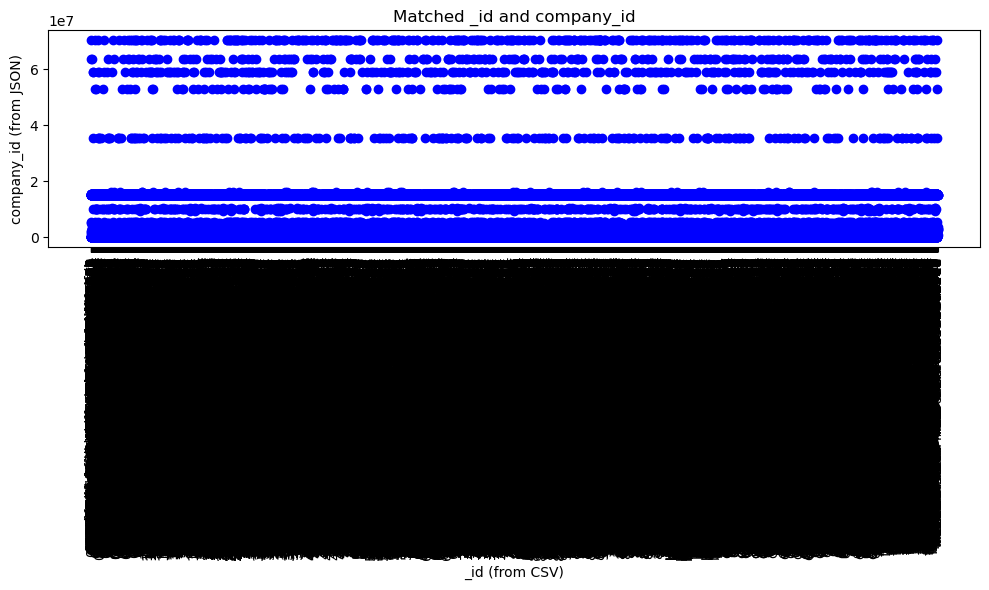

In [26]:
# Create a plot for the matched _id and company_id using NumPy arrays
plt.figure(figsize=(10, 6))
plt.scatter(matched_ids, matched_company_ids, c='blue', marker='o')
plt.title('Matched _id and company_id')
plt.xlabel('_id (from CSV)')
plt.ylabel('company_id (from JSON)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
